# Car Sales Prediction
Steps to follow:
    
    1. Problem defination
    
    2. Data Collection and preprocessing
    
    3. EDA
    
    4. Data Encoding
    
    5. Model Implementation and Evaluation
    
    6. Experimentation
    

# 1. Problem Defination
Given statement:
    Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.

# 2. Data Collection and preprocssing
For the data I am using the dataset from : https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction/data

About the dataset:

Predictors :- customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth

Target/Label :- Car Purchase Amount
        

In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import pickle
import warnings

warnings.simplefilter('ignore')

# importing evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_absolute_error,mean_squared_error,r2_score, accuracy_score

from sklearn.metrics import roc_auc_score, plot_roc_curve

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Data Collection

In [35]:
# load dataset
car_sales_df=pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
car_sales_df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# 1.2 Pre-processing

Let's dive deep into the dataset and clean the data as necessary

In [36]:
# checking for the null values in the data
car_sales_df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

The dataset doesn't have any null values

In [37]:
car_sales_df.dtypes

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

# 3 EDA

In [38]:
print("Total customer: ",len(car_sales_df['customer name'].value_counts()))

Total customer:  498


In [39]:
# visulaising the country feature
len(car_sales_df['country'].value_counts())

211

In [40]:
car_sales_df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


<AxesSubplot:>

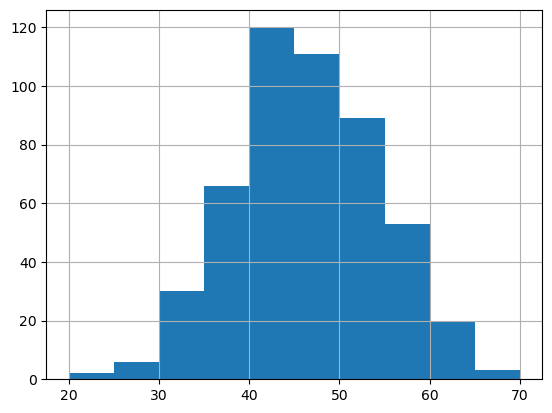

In [41]:
# distribution of age
car_sales_df.age.hist()

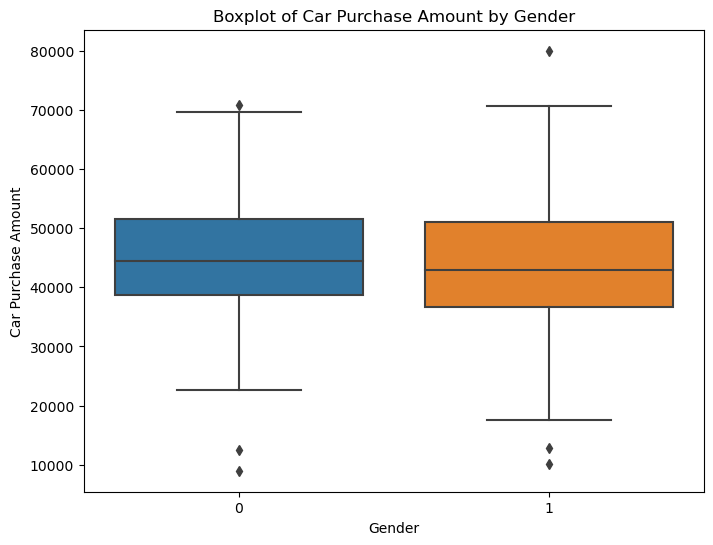

In [42]:
# plot for gender and car purchase amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='car purchase amount', data=car_sales_df)
plt.title('Boxplot of Car Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Car Purchase Amount')
plt.show()

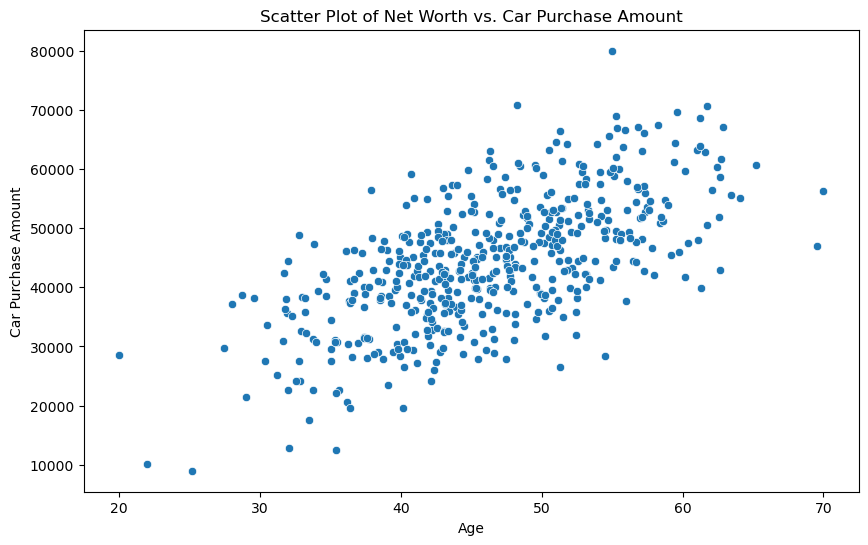

In [43]:
# Finding relation between age and car purchase amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='car purchase amount', data=car_sales_df)
plt.title('Scatter Plot of Net Worth vs. Car Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.show()

It seems that the people of age 40-50 are more in number in purchasing the car of price 40000-60000

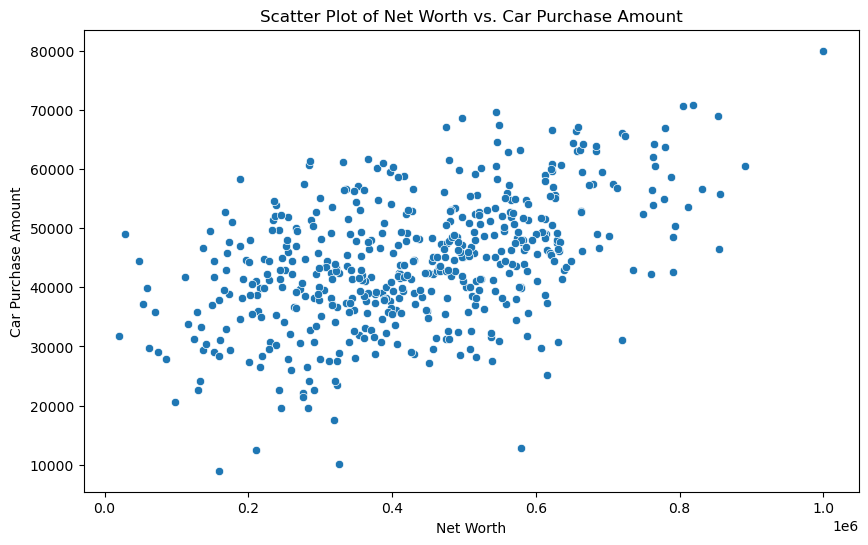

In [44]:
# Scatter plot for net worth vs car purhcase amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net worth', y='car purchase amount', data=car_sales_df)
plt.title('Scatter Plot of Net Worth vs. Car Purchase Amount')
plt.xlabel('Net Worth')
plt.ylabel('Car Purchase Amount')
plt.show()

It seems that the people with net worth 0.2-0.6 are purchasing the car of 30000-60000.
0.2 means 200,000 and 0.6 means 600,000

Where he is the only one person whose net worth is 1 million and he/she is the only one buying a car of 80,000

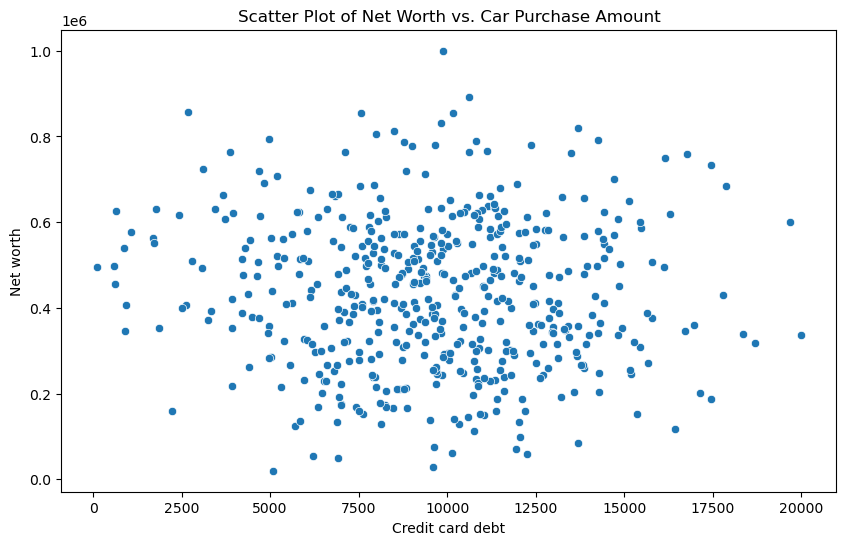

In [45]:
# scatter plot for net worth vs credit card debt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit card debt', y='net worth', data=car_sales_df)
plt.title('Scatter Plot of Net Worth vs. Car Purchase Amount')
plt.xlabel('Credit card debt')
plt.ylabel('Net worth')
plt.show()

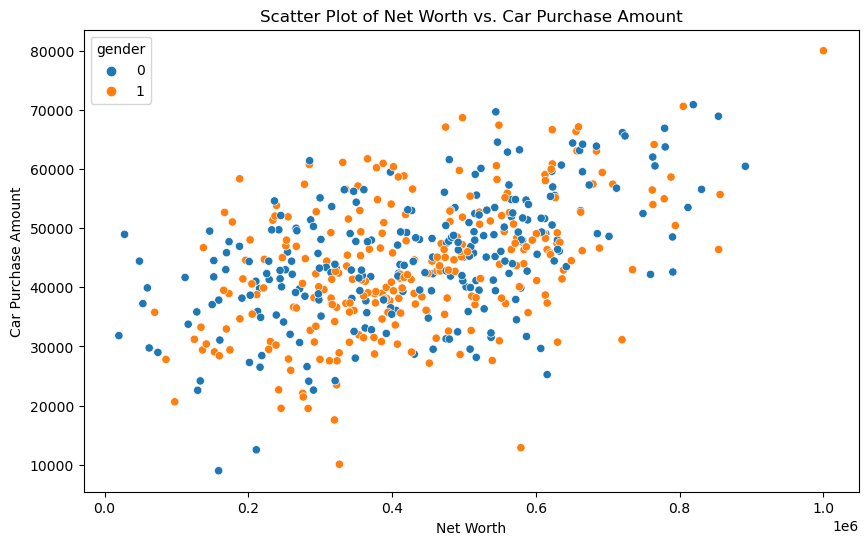

In [46]:
# Scatter plot for net worth vs car purhcase amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net worth', y='car purchase amount',hue='gender' ,data=car_sales_df)
plt.title('Scatter Plot of Net Worth vs. Car Purchase Amount')
plt.xlabel('Net Worth')
plt.ylabel('Car Purchase Amount')
plt.show()

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'annual Salary'}>,
        <AxesSubplot:title={'center':'credit card debt'}>],
       [<AxesSubplot:title={'center':'net worth'}>,
        <AxesSubplot:title={'center':'car purchase amount'}>]],
      dtype=object)

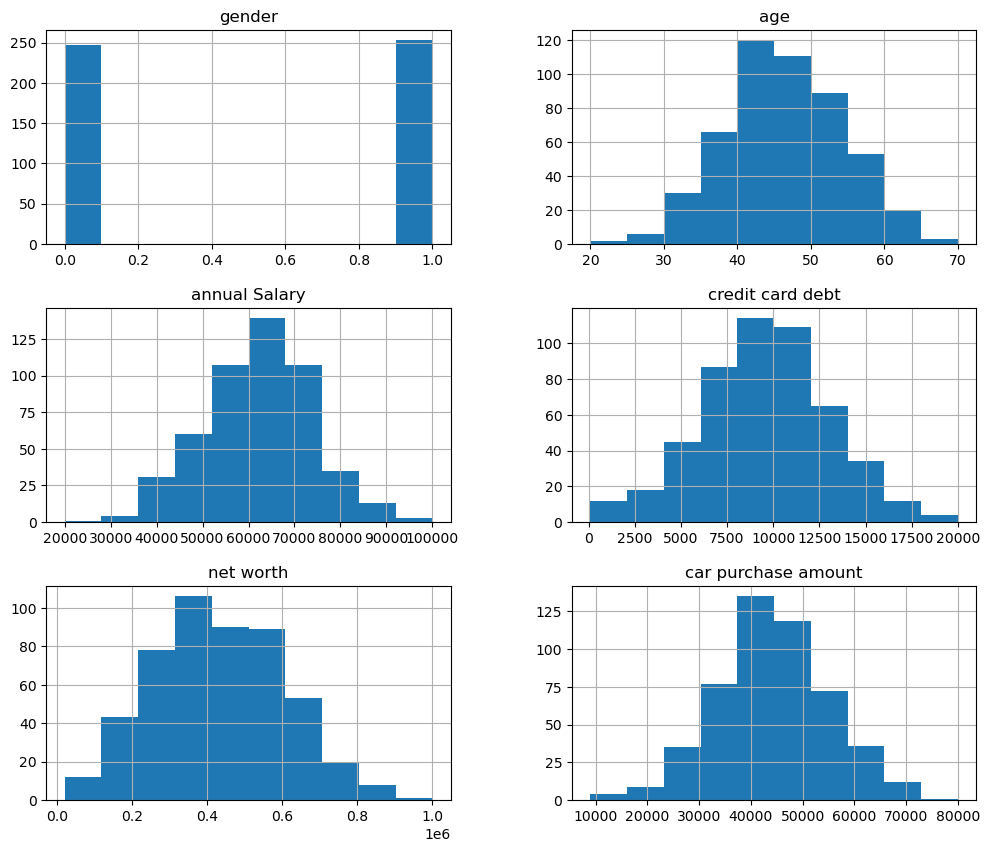

In [47]:
car_sales_df.hist(figsize = (12,10))

In [48]:
car_sales_df.corr()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


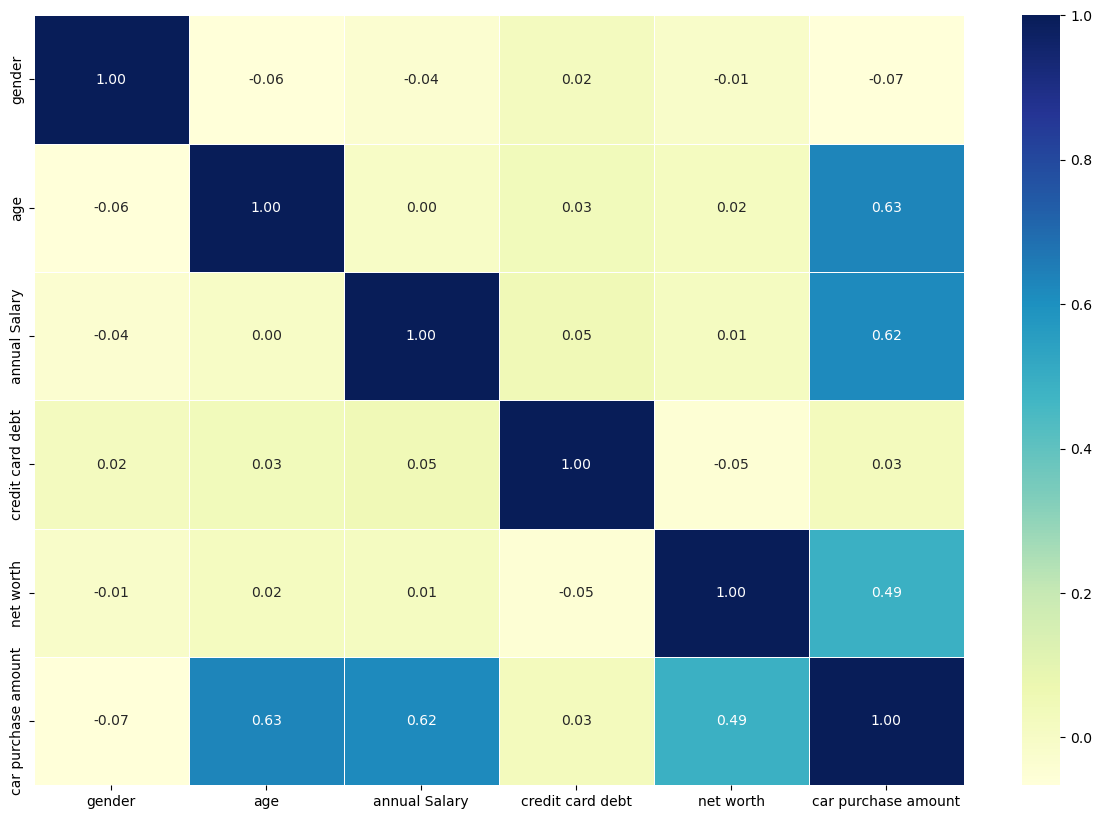

In [49]:
correlation_matrix=car_sales_df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2f',cmap='YlGnBu')


It seems that the age, annual salary, net worth are highly correlated with car purchase amount

# 4. Model Implementation and Evaluation

In this step I am going to evaluate Machine learning models and findout which machine learning models perform well 

In [50]:
# Since aim is to predict car purchase amount customer name, customer-email and country are not required so droping the columns
car_sales_df=car_sales_df.drop(columns=['customer name','customer e-mail','country'], axis=1)

In [51]:
car_sales_df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [52]:
# Split the data into X and y
X=car_sales_df.drop("car purchase amount", axis=1)
y=car_sales_df["car purchase amount"]

In [53]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Machine learning models
models={
    'Linear Regression':LinearRegression(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Lasso Regression':Lasso()
}

In [55]:
# function to fit and evaluate the models
def fit_and_evaluate(models,X_train,X_test,y_train,y_test):
    mse={}
    mae={}
    r2_scores={}
    for name,model in models.items():
#         Fit the model
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        # Calculate metrics
        mse[name] = mean_squared_error(y_test, y_pred)
        mae[name] = mean_absolute_error(y_test, y_pred)
        r2_scores[name] = r2_score(y_test, y_pred)
        
        print(f"Evaluating {name}")
        print('Mean Squared Error : ',mean_absolute_error(y_test, y_pred))
        print('Mean Absolute Error : ',mean_squared_error(y_test,y_pred))
        print('R2 Score',r2_score(y_test,y_pred))
        print('\n')
        
#         saving the models
        pickle.dump(model, open(f"{name}_model.pkl", "wb"))
    return mse, mae, r2_scores

In [56]:
mse_results, mae_results, r2_results=fit_and_evaluate(models=models, X_train=X_train,X_test=X_test,y_train=y_train ,y_test=y_test)

Evaluating Linear Regression
Mean Squared Error :  1.1535708937152231
Mean Absolute Error :  2.0943696055394585
R2 Score 0.9999999806028682


Evaluating Random Forest Regressor
Mean Squared Error :  1539.542091215998
Mean Absolute Error :  5127075.841430318
R2 Score 0.9525152744952479


Evaluating Lasso Regression
Mean Squared Error :  1.1632003816332144
Mean Absolute Error :  2.0993488446090693
R2 Score 0.9999999805567527




It seems that all three models are performing really well 

Text(0.5, 1.0, 'Scatter plot of True vs Predicted Values')

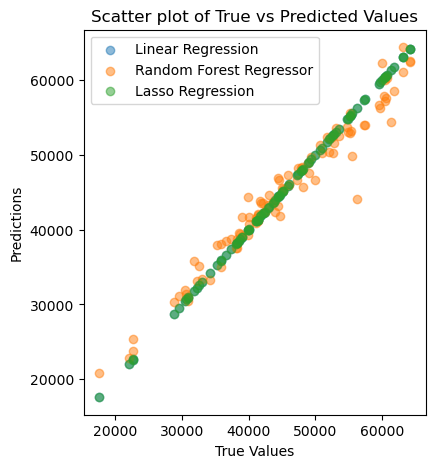

In [57]:
# Scatter plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('Scatter plot of True vs Predicted Values')

Lasso Regression and linear regression are giving ~100% accuracy as compare to Random Forest regressor

since lasso regression and linear regression have similar accuaracy I am going to implement linear regression for predicting new data

Reason not to choose Random Forest Regressor: Because of the higher Mean Square Error and Mean Absolute Error

In [58]:
# function to predict new price for user input

# load the trained linear regression model
loaded_model=pickle.load(open('Linear Regression_model.pkl','rb'))



def pred_new_price():
    print("Enter the details of the customer:")
    gender=int(input("Enter the gender (0=Male, 1=Female): "))
    age=int(input("Enter the age: "))
    annual_salary=int(input("Enter the annual salary($): "))
    net_worth=int(input("Enter the net_worth($): "))
    credit_card_debt=int(input("Enter the credit card debt($):"))
    
    user_inputs=np.array([[gender, age, annual_salary, credit_card_debt,net_worth]])
    price_predict=loaded_model.predict(user_inputs)
    
    print(f"The predicted price of the car the customer will buy is: ${price_predict}")
    

In [59]:
pred_new_price()

Enter the details of the customer:
Enter the gender (0=Male, 1=Female): 0
Enter the age: 32
Enter the annual salary: 100000
Enter the net_worth: 1000000
Enter the credit card debt:2000
The predicted price of the car the customer will buy is: [69999.77533212]
